In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import tensorflow as tf
from tensorflow.keras import datasets,layers,models
import matplotlib.pyplot as plt
import numpy as np
import pickle



In [ ]:
(x_train,y_train),(x_test,y_test)=datasets.mnist.load_data()
x_train.shape

(60000, 28, 28)

In [ ]:
x_train=x_train/255
x_test=x_test/255
y_train=y_train.reshape(-1,)
y_test=y_test.reshape(-1,)


In [ ]:
x_train.shape

(60000, 28, 28)

In [ ]:
x_train = x_train.reshape(list(x_train.shape) + [1])


In [ ]:
x_train[0].shape

(28, 28, 1)

In [ ]:
cnn=models.Sequential([
      layers.Conv2D(filters=25,padding="same",kernel_size=(5,5),activation='relu'),
      layers.MaxPooling2D((2,2)),
      layers.Conv2D(filters=25,padding="same",kernel_size=(5,5),activation='relu'),
      layers.MaxPooling2D((2,2)),
      layers.Flatten(),
      layers.Dense(128,activation='relu'),
      layers.Dropout(0.2),
      layers.Dense(64,activation='relu'),
      layers.Dropout(0.2),
      layers.Dense(10,activation='softmax')
])
cnn.compile(optimizer='sgd',
            loss='sparse_categorical_crossentropy',
            metrics=['accuracy'])
cnn.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=20)

Epoch 1/20
1875/1875 [==============================] - 11s 6ms/step - loss: 0.6776 - accuracy: 0.7809 - val_loss: 0.1528 - val_accuracy: 0.9512
Epoch 2/20
1875/1875 [==============================] - 10s 5ms/step - loss: 0.1889 - accuracy: 0.9440 - val_loss: 0.0910 - val_accuracy: 0.9710
Epoch 3/20
1875/1875 [==============================] - 10s 5ms/step - loss: 0.1373 - accuracy: 0.9590 - val_loss: 0.0693 - val_accuracy: 0.9787
Epoch 4/20
1875/1875 [==============================] - 10s 5ms/step - loss: 0.1132 - accuracy: 0.9667 - val_loss: 0.0585 - val_accuracy: 0.9806
Epoch 5/20
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0974 - accuracy: 0.9711 - val_loss: 0.0559 - val_accuracy: 0.9818
Epoch 6/20
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0863 - accuracy: 0.9752 - val_loss: 0.0463 - val_accuracy: 0.9860
Epoch 7/20
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0763 - accuracy: 0.9776 - val_loss: 0.0458 - val_ac

In [ ]:
x_test[0].shape

(28, 28, 1)

In [ ]:
x_test=x_test.reshape(list(x_test.shape)+[1])


array([[[0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ]],

       [[0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        

In [ ]:
y_pred=cnn.predict(x_test)
y_pred=[np.argmax(i)for i in y_pred]



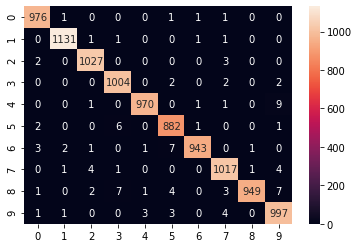

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sn
cm=confusion_matrix(y_test,y_pred)
sn.heatmap(cm,annot=True, fmt="d")

In [ ]:
from keras.models import save_model
model = save_model(cnn,'/content/drive/MyDrive/digit_recong.h5')